#**Data analysis Domestic violence**
-----------------------
##This notebook analyzes business crises, emergency situations in a context of domestic violence.

-----------------------
#####**objetive**

Apply concepts of probability distributions to model certain aspects of the crisis. For example, modeling the distribution of financial losses. Luego, use statistical inference techniques to draw conclusions about the crisis.

#####**DataSets**

- Reporte Delito Violencia Intrafamiliar Policía Nacional | Datos Abiertos Colombia
    https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delito-Violencia-Intrafamiliar-Polic-a-Nac/vuyt-mqpw/about_data

- Tasa de Violencia intrafamiliar en Bogotá D.C.
    https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-de-violencia-intrafamiliar

- 

#####**Importing necessary libraries**

In [177]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [178]:
#variables
National_police_report_route = 'Files/Reporte_Delito_Violencia_Intrafamiliar_Polic_a_Nacional_20241030.csv'
Bogota_police_report_route ='Files/obs_intrafamiliar.xlsx'
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [179]:
#to_delete : information
ruta_absoluta = os.path.abspath(Bogota_police_report_route)
print(ruta_absoluta)

c:\Users\ALEXANDER\Documents\Especializacion\Tratamiento_y_analitica_datos\Tarea1\Codigo\Analitica_datos\Files\obs_intrafamiliar.xlsx


In [180]:
df_police_report= pd.read_csv(National_police_report_route)
df_police_report['FECHA HECHO'] = pd.to_datetime(df_police_report['FECHA HECHO'], format='%d/%m/%Y')
df_police_report['AÑO'] = df_police_report['FECHA HECHO'].dt.year
print("List of fields and data types:")
print(df_police_report.dtypes)

List of fields and data types:
DEPARTAMENTO            object
MUNICIPIO               object
CODIGO DANE             object
ARMAS MEDIOS            object
FECHA HECHO     datetime64[ns]
GENERO                  object
GRUPO ETARIO            object
CANTIDAD                 int64
AÑO                      int32
dtype: object


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_2240\658972624.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_police_report= pd.read_csv(National_police_report_route)


In [181]:
# Reading input file Excel
df_bogota_report = pd.read_excel(Bogota_police_report_route)

print("List of fields and data types:")
print(df_bogota_report.dtypes)

List of fields and data types:
ANO                           int64
GRUPOEDAD                    object
SEXO                         object
NOMBRELOCALIDADRESIDENCIA    object
PERTENENCIAETNICA            object
TIPOASEGURAMIENTO            object
ENTIDADADMINISTRADORA        object
LUGOCURRENCIAEMOCIONAL       object
LUGOCURRENCIAFISICA          object
LUGOCURRENCIASEXUAL          object
LUGOCURRENCIAECONOMICA       object
LUGOCURRENCIANEGLIGENCIA     object
LUGOCURRENCIAABANDONO        object
dtype: object


In [182]:
#print of first rows 
#National Dataset
print(df_police_report.head())

   DEPARTAMENTO          MUNICIPIO CODIGO DANE                 ARMAS MEDIOS  \
0     ATLÁNTICO  BARRANQUILLA (CT)     8001000  ARMA BLANCA / CORTOPUNZANTE   
1        BOYACÁ            DUITAMA    15238000  ARMA BLANCA / CORTOPUNZANTE   
2       CAQUETÁ        PUERTO RICO    18592000  ARMA BLANCA / CORTOPUNZANTE   
3      CASANARE               MANÍ    85139000  ARMA BLANCA / CORTOPUNZANTE   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)    11001000  ARMA BLANCA / CORTOPUNZANTE   

  FECHA HECHO     GENERO GRUPO ETARIO  CANTIDAD   AÑO  
0  2010-01-01  MASCULINO      ADULTOS         1  2010  
1  2010-01-01   FEMENINO      ADULTOS         1  2010  
2  2010-01-01  MASCULINO      ADULTOS         1  2010  
3  2010-01-01   FEMENINO      ADULTOS         1  2010  
4  2010-01-01   FEMENINO      ADULTOS         1  2010  


In [183]:
#print of first rows 
#Bogota Dataset
print(df_bogota_report.head())

    ANO        GRUPOEDAD    SEXO NOMBRELOCALIDADRESIDENCIA PERTENENCIAETNICA  \
0  2016    De 1 - 5 años   Mujer                       NaN             Otros   
1  2016    De 1 - 5 años  Hombre                       NaN             Otros   
2  2016   De 6 - 13 años   Mujer                       NaN             Otros   
3  2016  De 27 - 44 años   Mujer                       NaN             Otros   
4  2016  De 27 - 44 años   Mujer                       NaN             Otros   

  TIPOASEGURAMIENTO   ENTIDADADMINISTRADORA LUGOCURRENCIAEMOCIONAL  \
0      Contributivo          Salud Total SA            1. Vivienda   
1      Contributivo          Salud Total SA            1. Vivienda   
2        Subsidiado  Capital Salud EPSS SAS            1. Vivienda   
3        Subsidiado  Capital Salud EPSS SAS            1. Vivienda   
4      Contributivo             Medimas EPS            1. Vivienda   

  LUGOCURRENCIAFISICA LUGOCURRENCIASEXUAL LUGOCURRENCIAECONOMICA  \
0           No aplica         

In [184]:
# Filter only rows where gender is:  MASCULINO
df_masculino_incidents = df_police_report[df_police_report['GENERO'] == 'MASCULINO']

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_2240\1262628910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_masculino_incidents, x='ARMAS MEDIOS', palette='viridis')


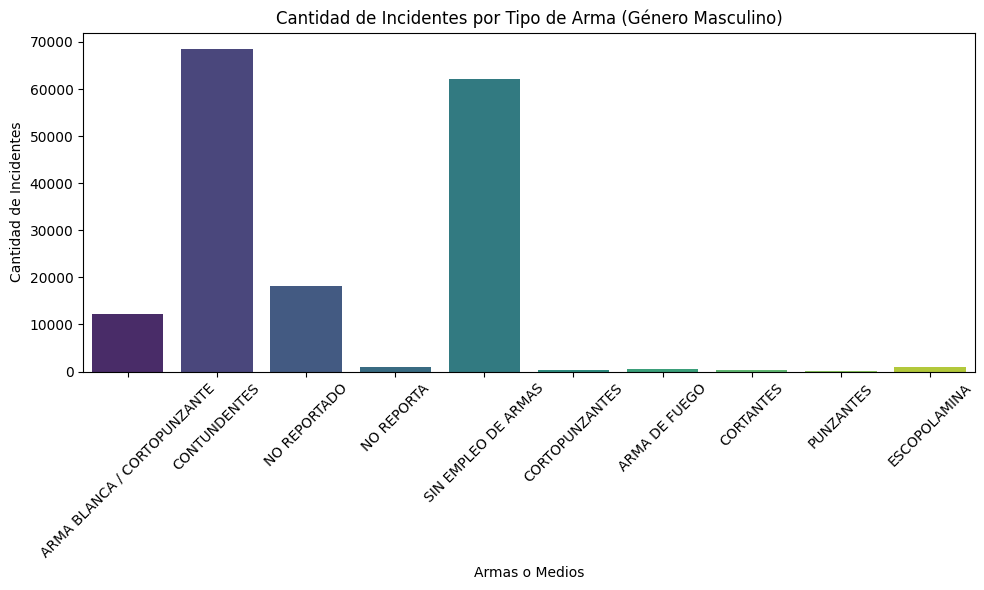

In [185]:
# Bar graph showing the number of incidents using 'ARMAS MEDIOS'
plt.figure(figsize=(10, 6))  
sns.countplot(data=df_masculino_incidents, x='ARMAS MEDIOS', palette='viridis')

# Graph properties
plt.title('Cantidad de Incidentes por Tipo de Arma (Género Masculino)')
plt.xlabel('Armas o Medios')
plt.ylabel('Cantidad de Incidentes')
plt.xticks(rotation=45) 

# Show
plt.tight_layout()
plt.show()

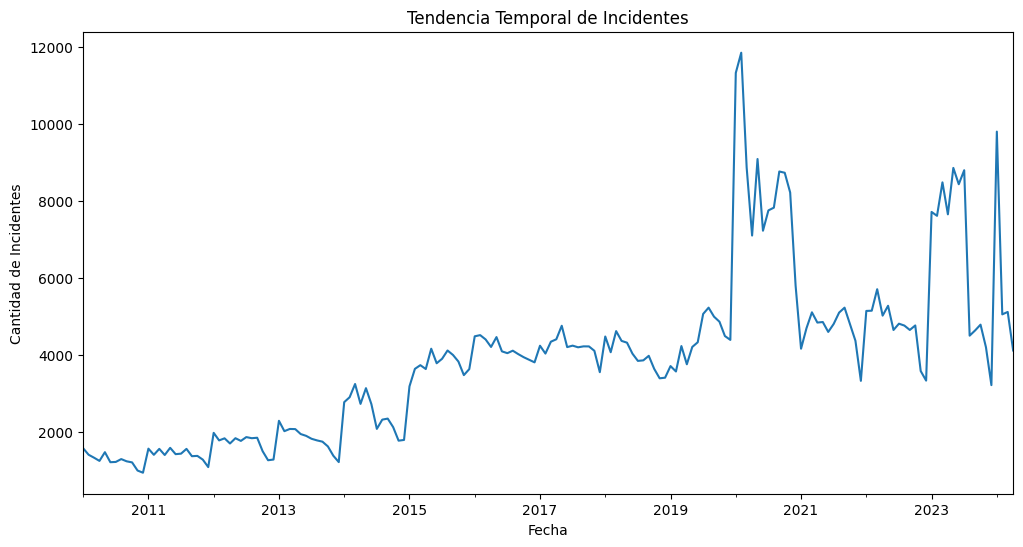

In [186]:
#Incidents temporay distributiono using:  FECHA HECHO.
df_tiempo = df_police_report.groupby(df_police_report['FECHA HECHO'].dt.to_period('M')).size()
df_tiempo.plot(kind='line', figsize=(12, 6))
plt.title('Tendencia Temporal de Incidentes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Incidentes')
plt.show()

##Seasonality effect

We review whether there are seasonal variance patterns present in the last 5 years, we verify the monthly variation compared between years to identify patterns.

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_2240\1003544681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['MES'] = df_filtrado['FECHA HECHO'].dt.month


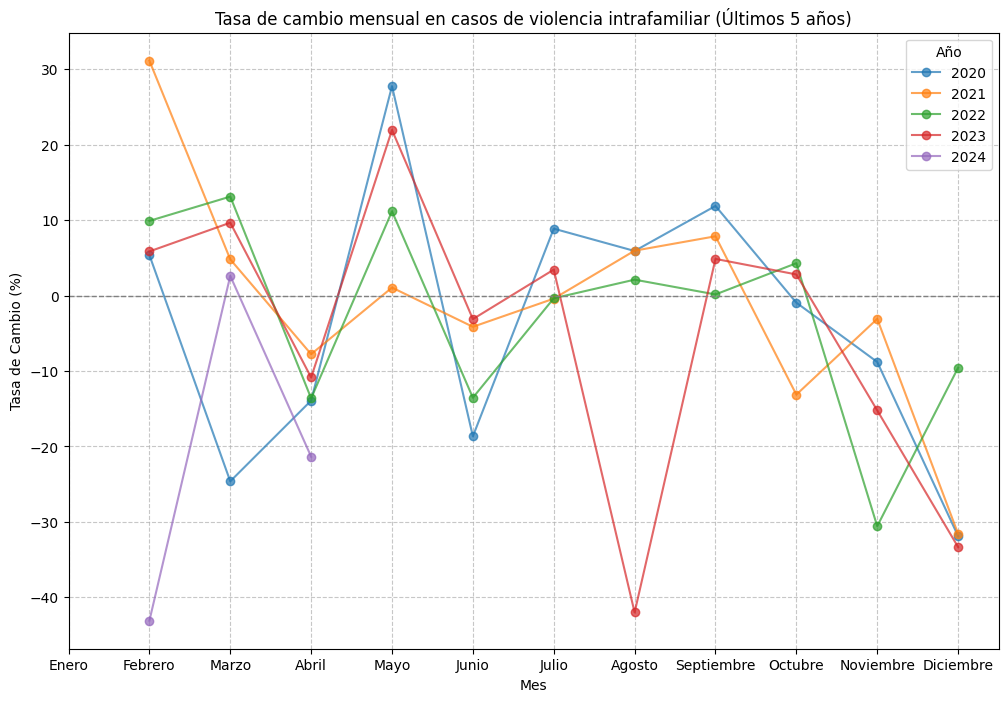

In [187]:
# We get the last 5 years
año_max = df_police_report['FECHA HECHO'].dt.year.max()
años_filtrados = list(range(año_max - 4, año_max + 1))
df_filtrado = df_police_report[df_police_report['FECHA HECHO'].dt.year.isin(años_filtrados)]

# year and month filtering to get total monthly cases
df_filtrado['MES'] = df_filtrado['FECHA HECHO'].dt.month
casos_mensuales = df_filtrado.groupby(['AÑO', 'MES'])['CANTIDAD'].sum().reset_index()

# Calculus: monthly exchange rate
casos_mensuales['TASA_CAMBIO'] = (casos_mensuales.groupby('AÑO')['CANTIDAD'].pct_change() * 100).round(2)

# Graph
plt.figure(figsize=(12, 8))
for año in años_filtrados:
    datos_año = casos_mensuales[casos_mensuales['AÑO'] == año]
    plt.plot(datos_año['MES'], datos_año['TASA_CAMBIO'], marker='o', label=f'{año}', alpha=0.7)

# Graph properties
plt.title('Tasa de cambio mensual en casos de violencia intrafamiliar (Últimos 5 años)')
plt.xlabel('Mes')
plt.ylabel('Tasa de Cambio (%)')
plt.xticks(range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Línea de referencia en 0%
plt.legend(title="Año")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [188]:
#Show data
tabla_tasa_cambio = casos_mensuales.pivot(index='MES', columns='AÑO', values='TASA_CAMBIO')
tabla_tasa_cambio.index = meses
print(tabla_tasa_cambio)

AÑO          2020   2021   2022   2023   2024
Enero         NaN    NaN    NaN    NaN    NaN
Febrero      5.37  31.13   9.90   5.85 -43.10
Marzo      -24.62   4.80  13.12   9.66   2.61
Abril      -13.92  -7.77 -13.62 -10.86 -21.35
Mayo        27.76   1.06  11.17  21.95    NaN
Junio      -18.66  -4.14 -13.54  -3.12    NaN
Julio        8.87  -0.41  -0.36   3.44    NaN
Agosto       5.91   5.95   2.11 -42.00    NaN
Septiembre  11.88   7.86   0.15   4.86    NaN
Octubre     -0.94 -13.13   4.29   2.80    NaN
Noviembre   -8.80  -3.09 -30.57 -15.22    NaN
Diciembre  -31.88 -31.58  -9.57 -33.33    NaN
